# Overview
##### The Emotion Classifier using NLP is a ML project that predicts the emotion/sentiment tone of a text, such as sadness, anger, love, surprise, fear, and joy. It uses Natural Language Processing(NLP) to preprocess text data and train a model for emotion classification. The main idea is to make computers understand human feelings from written text, which can be applied in areas like chatbots, customer feedback systems etc.

## 1. Import necessary libs

In [50]:
# Data handling
import numpy as np 
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Text preprocessing and tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Splitting the data
from sklearn.model_selection import train_test_split

# Machine learning models for text classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Data Exploration

In [2]:
df = pd.read_csv('emotiondataset.txt', names=['text', 'emotion'], header=None, sep=';')
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.shape

(16000, 2)

In [4]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [5]:
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

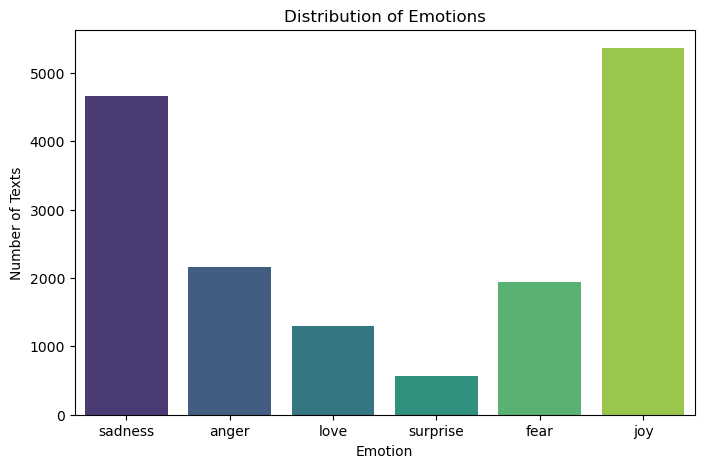

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='emotion', hue='emotion', palette='viridis')

plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of Texts')
plt.show()

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df[df.duplicated(keep=False)]

,text,emotion
4975,i feel more adventurous willing to take risks ...,joy
13846,i feel more adventurous willing to take risks ...,joy


In [9]:
# df = df.drop_duplicates(keep='first')

### Label encoding

In [10]:
unique_emotions = df['emotion'].unique()
emo_numbers = {}

for i, emotion in enumerate(unique_emotions): 
    emo_numbers[emotion] = i

emo_numbers

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

In [11]:
df['emotion'] = df['emotion'].map(emo_numbers)

In [12]:
df.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


## 3. Data cleaning

In [13]:
df['text'] = df['text'].apply(lambda x : x.lower())

In [14]:
# remove punctuation marks
import string

def remove_punctuation(txt): 
    return txt.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)

In [15]:
# remove numbers
def remove_no(txt): 
    text = ""
    for ch in txt: 
        if not ch.isdigit(): 
            text += ch
    return text

df['text'] = df['text'].apply(remove_no)

In [16]:
# remove emojis -> emojis are unicode and not ascii 
def remove_emoji(txt): 
    text = ""
    for ch in txt: 
        if ch.isascii(): 
            text += ch 
    return text

df['text'] = df['text'].apply(remove_emoji)

In [17]:
# Download NLTK 
nltk.download('punkt') # used for tokenizing
nltk.download('stopwords') # stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
stop_words = set(stopwords.words('english'))
len(stop_words)

198

In [19]:
df.loc[1]['text']  # there is many stop words

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [20]:
# Remove stopwords 
def remove_stopwords(txt): 
    words = word_tokenize(txt) # list of word
    text = []

    for word in words: 
        if not word in stop_words: 
            text.append(word)
    return ' '.join(text)

df['text'] = df['text'].apply(remove_stopwords)

In [21]:
df.loc[1]['text'] 

'go feeling hopeless damned hopeful around someone cares awake'

### Split the data 

In [22]:
X = df['text']
y = df['emotion']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Vectorization using Bag-of-Word

In [24]:
# bow_vectorizer = CountVectorizer(ngram_range=(1,2)) 
bow_vectorizer = CountVectorizer()

In [25]:
X_train_bow_vec = bow_vectorizer.fit_transform(X_train)
X_test_bow_vec = bow_vectorizer.transform(X_test)

## Logistic Regression - BoW

In [26]:
logi_reg_bow_model = LogisticRegression(max_iter=1000)

In [27]:
logi_reg_bow_model.fit(X_train_bow_vec, y_train)

LogisticRegression(max_iter=1000)

In [28]:
ypred_bow_logi_reg = logi_reg_bow_model.predict(X_test_bow_vec)

In [52]:
# Evaluation metrics 
acc_bow_log_reg = accuracy_score(y_test, ypred_bow_logi_reg)
acc_bow_log_reg

0.88875

## Naive Bayes - BoW

In [30]:
nb_bow_model = MultinomialNB()

In [31]:
nb_bow_model.fit(X_train_bow_vec, y_train)

MultinomialNB()

In [32]:
ypred_bow_nb = nb_bow_model.predict(X_test_bow_vec)

In [33]:
acc_bow_nb = accuracy_score(y_test, ypred_bow_nb)
acc_bow_nb

0.7678125

# Vectorization using TF-IDF 

In [34]:
tfidf_vec = TfidfVectorizer()

In [35]:
X_train_tfidf_vec = tfidf_vec.fit_transform(X_train)
X_test_tfidf_vec = tfidf_vec.transform(X_test)

## Logistic Regression - TF-IDF 

In [36]:
logi_reg_tfidf_model = LogisticRegression(max_iter=1000)

In [37]:
logi_reg_tfidf_model.fit(X_train_tfidf_vec, y_train)

LogisticRegression(max_iter=1000)

In [38]:
ypred_tfidf_logi_reg = logi_reg_tfidf_model.predict(X_test_tfidf_vec)

In [39]:
acc_tfidf_log_reg = accuracy_score(y_test, ypred_tfidf_logi_reg)
acc_tfidf_log_reg

0.8615625

## Naive Bayes - TF-IDF

In [40]:
nb_tfidf_model = MultinomialNB()

In [41]:
nb_tfidf_model.fit(X_train_tfidf_vec, y_train)

MultinomialNB()

In [42]:
ypred_tfidf_nb = nb_tfidf_model.predict(X_test_tfidf_vec)

In [43]:
acc_tfidf_nb = accuracy_score(y_test, ypred_tfidf_nb)
acc_tfidf_nb

0.6609375

In [44]:
print("Accuracy (BoW + Logistic Regression)    : ", acc_bow_log_reg)
print("Accuracy (BoW + Naive Bayes)            : ", acc_bow_nb)
print("Accuracy (TF-IDF + Logistic Regression) : ", acc_tfidf_log_reg)
print("Accuracy (TF-IDF + Naive Bayes)         : ", acc_tfidf_nb)

Accuracy (BoW + Logistic Regression)    :  0.88875
Accuracy (BoW + Naive Bayes)            :  0.7678125
Accuracy (TF-IDF + Logistic Regression) :  0.8615625
Accuracy (TF-IDF + Naive Bayes)         :  0.6609375


### Among the four models tested, **Bag of Words with Logistic Regression** gave the highest accuracy of **0.8887**.

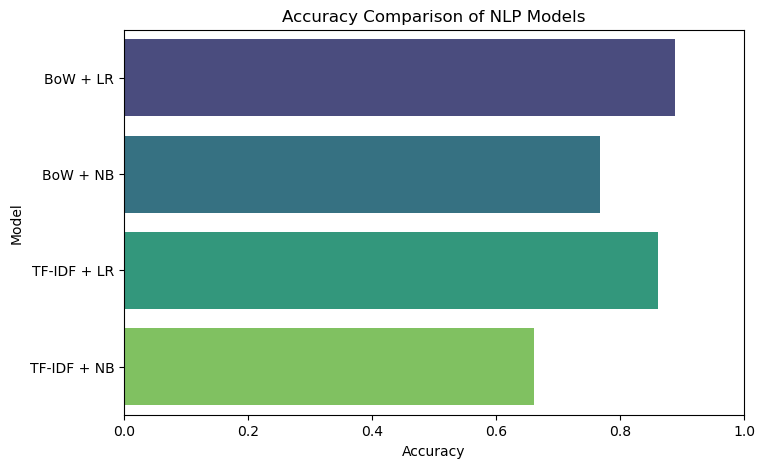

In [45]:
# data
data = {
    'Model': ["BoW + LR", "BoW + NB", "TF-IDF + LR", "TF-IDF + NB"],
    'Accuracy': [acc_bow_log_reg, acc_bow_nb, acc_tfidf_log_reg, acc_tfidf_nb]
}
df_acc = pd.DataFrame(data)

# plot
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=df_acc, hue='Model', palette='viridis')
plt.title("Accuracy Comparison of NLP Models")
plt.xlim(0, 1)
plt.show()

## Save the trained Logistic Regression model using Bag of Words (BoW) vectorization

In [49]:
import joblib
joblib.dump(logi_reg_bow_model, 'LogRegEmo.pkl')
joblib.dump(bow_vectorizer, 'bow_vectorizer.pkl')

['bow_vectorizer.pkl']

In [47]:
import sklearn, numpy, pandas, joblib
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)

scikit-learn: 1.6.1
numpy: 2.1.3
pandas: 2.2.3
joblib: 1.4.2
